<a href="https://colab.research.google.com/github/almartcas/TFG/blob/main/Experimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento 1

En el primer experimento vamos a trabajar con diagramas de persistencia, estudiaremos cómo influye la existencia de ruido en diferentes tipos de datasets utilizando la distancia de bottleneck como medida de comparación entre un dataset limpio y datasets con diferente cantidad de ruido.

In [ ]:
pip install Cython ripser tadasets

     |████████████████████████████████| 71kB 3.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for ripser: filename=ripser-0.6.0-cp37-cp37m-linux_x86_64.whl size=454934 sha256=01ba991c9ee7749bcd7eb3215f7f1d820cbc095a3e812de5f71430a5e96e08d2
  Stored in directory: /root/.cache/pip/wheels/95/1e/13/59da989de59903698d767dcb19414163e683a2dd31edf80417
Successfully built ripser
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18119 sha256=2f83ae0ae031d25ea45039b61d7e44a436d09ab9d28526405b831cd45cb178e3
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built hopcroftkarp


In [ ]:
import numpy as np
import persim
import tadasets
import ripser
import matplotlib.pyplot as plt

# Esfera

A continuación, vamos a utilizar varios niveles de ruido y compararlo con el dataset limpio y ver cómo aunmenta la distancia a medida que aumenta el nivel de ruido.

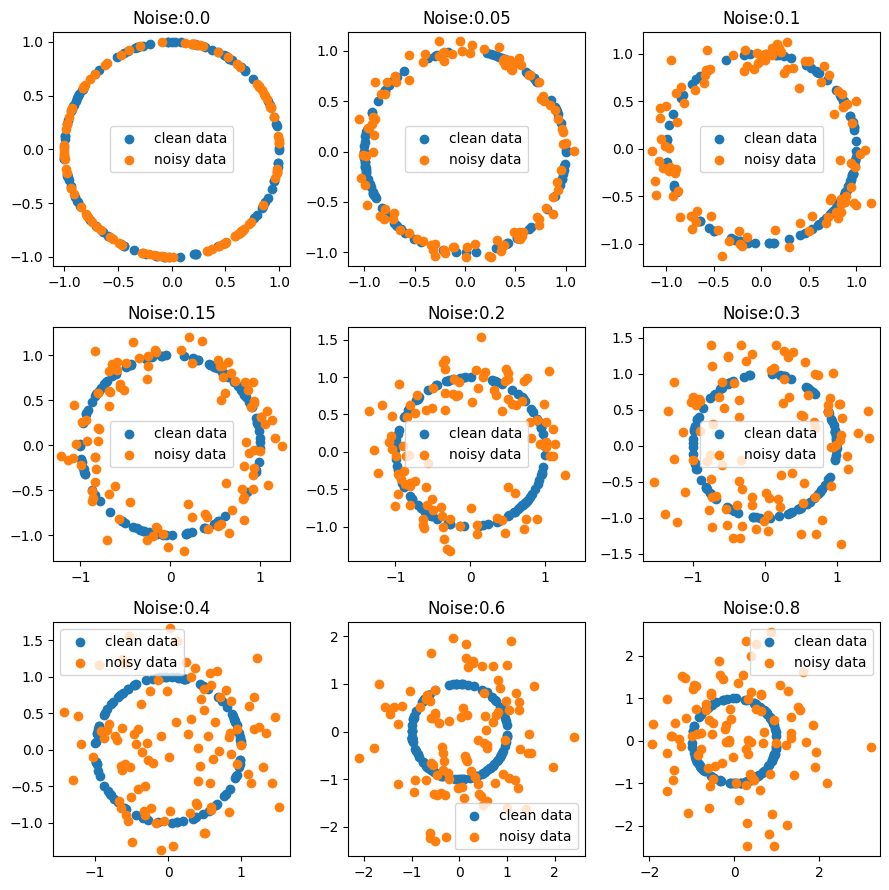

In [ ]:
plt.figure(figsize=(9,9))
for i, n in enumerate([0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    plt.subplot(331+i)

    ds_clean = tadasets.dsphere(d=1, n=100, noise=0.0)

    ds = tadasets.dsphere(d=1, n=100, noise=n)

    plt.scatter(ds_clean[:,0], ds_clean[:,1], label="clean data")
    plt.scatter(ds[:,0], ds[:,1], label="noisy data")
    plt.title("Noise:{}".format(n))
    plt.axis('equal')
    plt.legend()

plt.tight_layout()
plt.show()

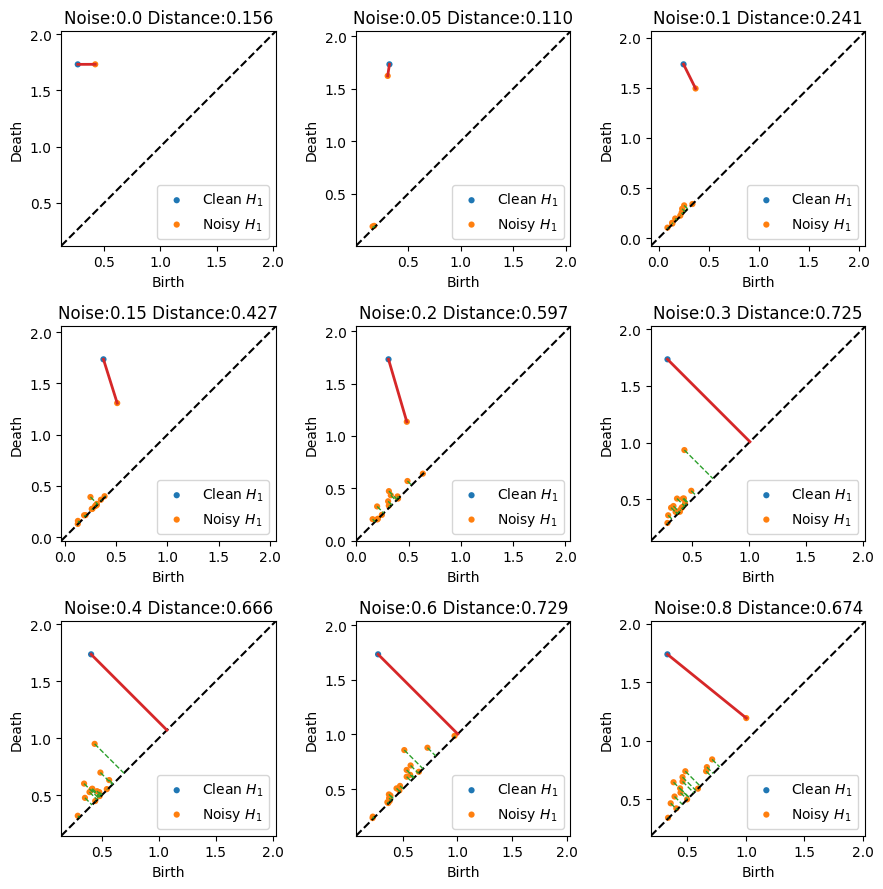

In [ ]:
plt.figure(figsize=(9,9))
for i, n in enumerate([0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    plt.subplot(331+i)

    ds_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
    dgm_clean = ripser.ripser(ds_clean)['dgms'][1]

    ds = tadasets.dsphere(d=1, n=100, noise=n)
    dgm = ripser.ripser(ds)['dgms'][1]

    d, matching = persim.bottleneck(
        dgm_clean,
        dgm,
        matching=True
    )

    persim.bottleneck_matching(dgm_clean, dgm, matching, labels=['Clean $H_1$', 'Noisy $H_1$'])

    plt.title("Noise:{} Distance:{:.3f}".format(n, d))

plt.tight_layout()
plt.show()

# Toro.

Igual que en el caso de la esfera construimos un toro limpio y toros con diferentes niveles de ruido, y calculamos la distancia que hay entre sus diagramas de persistencia.

In [ ]:
from mpl_toolkits import mplot3d

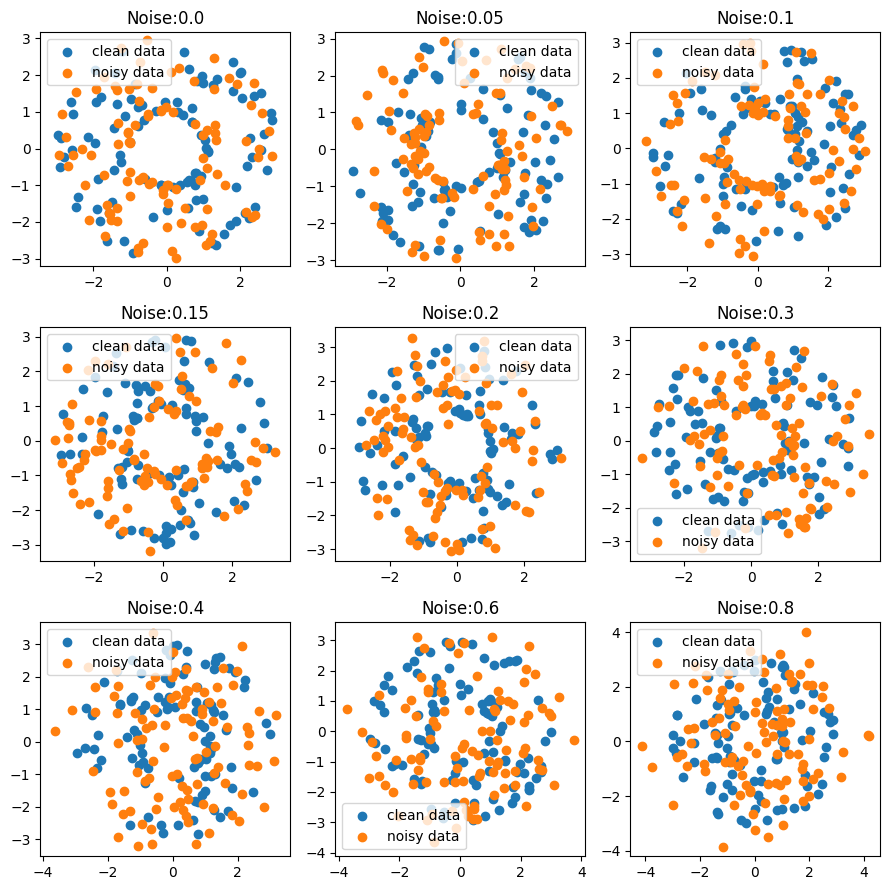

In [ ]:
plt.figure(figsize=(9,9))
for i, n in enumerate([0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    plt.subplot(331+i)

    ds_clean = tadasets.torus( n=100, noise=0.0)

    ds = tadasets.torus( n=100, noise=n)

    plt.scatter(ds_clean[:,0], ds_clean[:,1], label="clean data")
    plt.scatter(ds[:,0], ds[:,1], label="noisy data")
    plt.title("Noise:{}".format(n))
    plt.axis('equal')
    plt.legend()

plt.tight_layout()
plt.show()

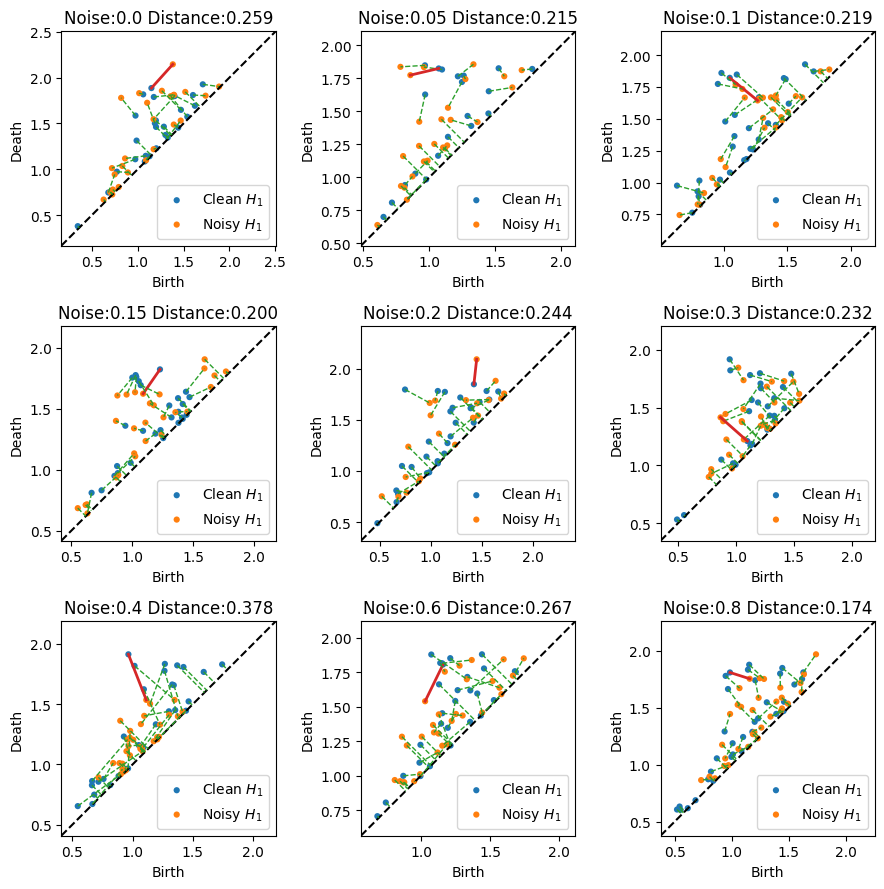

In [ ]:
plt.figure(figsize=(9,9))
for i, n in enumerate([0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    plt.subplot(331+i)

    ds_clean = tadasets.torus(n=100, noise=0.0)
    dgm_clean = ripser.ripser(ds_clean)['dgms'][1]

    ds = tadasets.torus(n=100, noise=n)
    dgm = ripser.ripser(ds)['dgms'][1]

    d, matching = persim.bottleneck(
        dgm_clean,
        dgm,
        matching=True
    )

    persim.bottleneck_matching(dgm_clean, dgm, matching, labels=['Clean $H_1$', 'Noisy $H_1$'])

    plt.title("Noise:{} Distance:{:.3f}".format(n, d))

plt.tight_layout()
plt.show()

# Experimento 2

El segundo experimento consiste en utilizar las imagenes de persistencia para calsificar datasets según su naturaleza. Primero, definimos uestra colección de nubes de puntos, las formas serán solo ruido, círculos y ruido y lunas y ruido.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

In [ ]:
N = 300
N_per_class = 100
N_in_class = 600

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

def moon(N, scale, offset):
    return offset + scale * datasets.make_moons(n_samples=N, noise=0.05)[0]


just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

half = 150

with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]

with_moon = [np.concatenate((moon(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]
            

datas = []
datas.extend(just_noise)
datas.extend(with_circle)
datas.extend(with_moon)

# Define labels
labels[:N_per_class] = 0
labels[N_per_class: 2*N_per_class] = 1
labels[2*N_per_class:] = 2

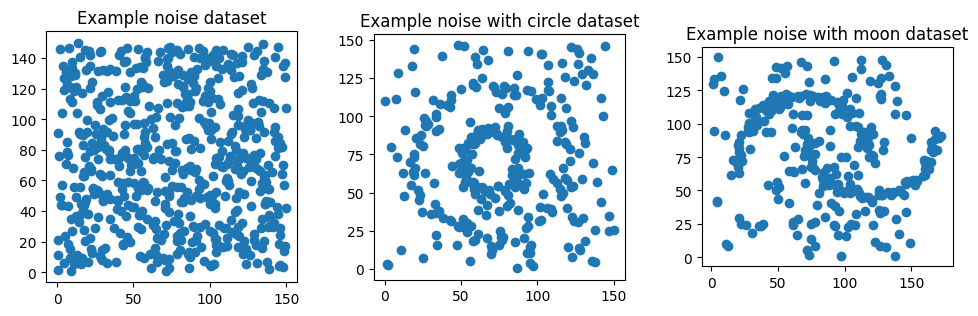

In [ ]:
# Visualize the data
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(10, 3.3)

xs, ys = just_noise[0][:,0], just_noise[0][:,1]
axs[0].scatter(xs, ys)
axs[0].set_title("Example noise dataset")
axs[0].set_aspect('equal', 'box')

xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
axs[1].scatter(xs_, ys_)
axs[1].set_title("Example noise with circle dataset")
axs[1].set_aspect('equal', 'box')

xs_, ys_ = with_moon[0][:,0], with_moon[0][:,1]
axs[2].scatter(xs_, ys_)
axs[2].set_title("Example noise with moon dataset")
axs[2].set_aspect('equal', 'box')


fig.tight_layout()

A continuacion, construimos el diagrama de persistencia H1 para cada nube de puntos utilizando los complejos de Vietoris-Rips.

In [ ]:
rips = Rips(maxdim=1, coeff=2)
diagrams = [rips.fit_transform(data) for data in datas]
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


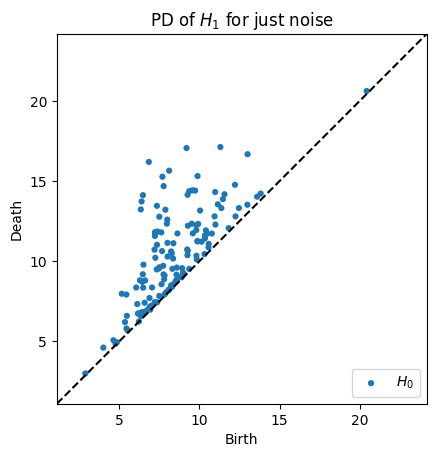

In [ ]:
rips.plot(diagrams_h1[0], show=False)
plt.title("PD of $H_1$ for just noise")
plt.show()

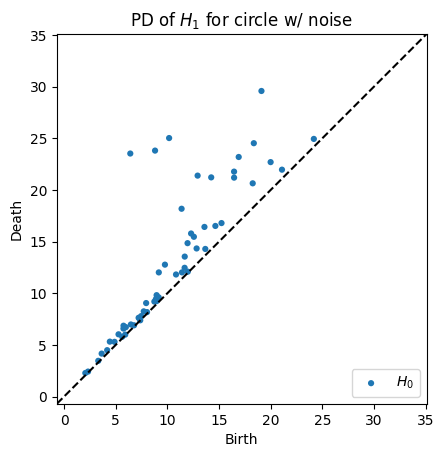

In [ ]:
rips.plot(diagrams_h1[100], show=False)
plt.title("PD of $H_1$ for circle w/ noise")
plt.show()

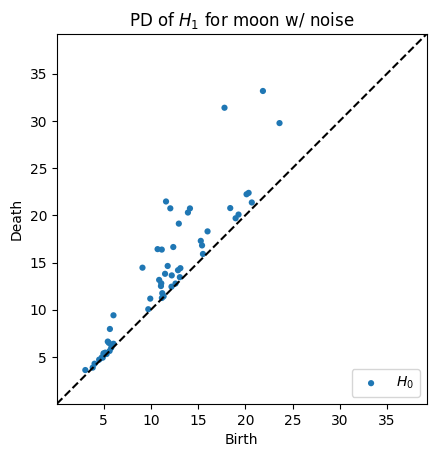

In [ ]:
rips.plot(diagrams_h1[200], show=False)
plt.title("PD of $H_1$ for moon w/ noise")
plt.show()

Convertimos los PD anteriores en imágenes de persistencia

In [ ]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)

In [ ]:
pimgr

PersistenceImager(birth_range=(1.2119956016540527, 39.21199560165405), pers_range=(-0.026444673538208008, 21.973555326461792), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

In [ ]:
imgs_array = np.array([img.flatten() for img in imgs])

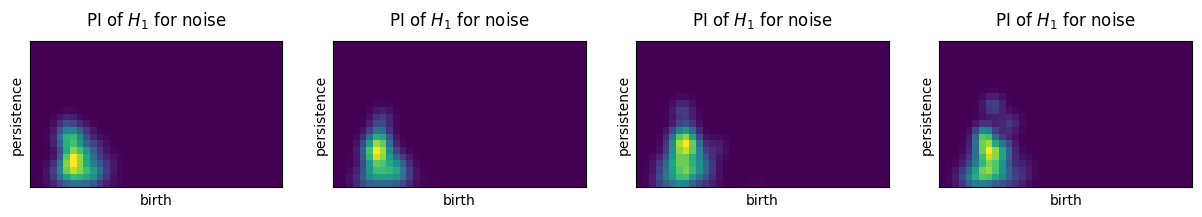

In [ ]:
plt.figure(figsize=(15,7.5))
for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

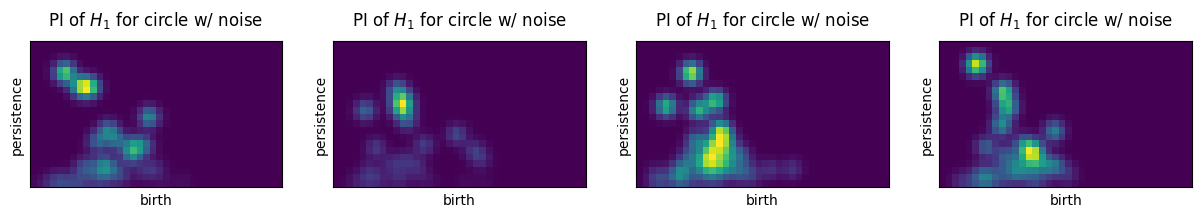

In [ ]:
plt.figure(figsize=(15,7.5))

for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[100+i], ax)
    plt.title("PI of $H_1$ for circle w/ noise")


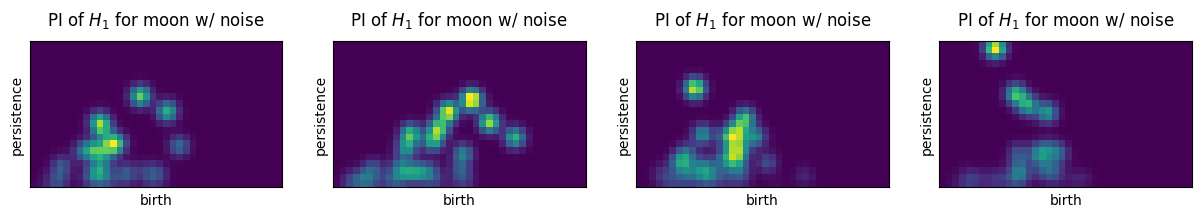

In [ ]:
plt.figure(figsize=(15,7.5))
for i in range(4):
    ax = plt.subplot(240+i+5)
    pimgr.plot_image(imgs[200+i], ax)
    plt.title("PI of $H_1$ for moon w/ noise")

Una vez tenemos toda la información de la colección inicial en forma de vector de imágenes de persistencia, entrenamos con ella el clasifiador y comprobamos su precisión.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels, test_size=0.40, random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test, y_test)

0.9916666666666667

Comparación precisión con las categorías reales

In [ ]:
lr.predict(X_test)

array([2., 2., 1., 0., 2., 2., 1., 1., 0., 1., 2., 0., 2., 0., 1., 2., 2.,
       2., 1., 1., 0., 1., 2., 2., 2., 0., 2., 2., 1., 2., 0., 1., 0., 0.,
       2., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2., 1., 2., 1.,
       1., 2., 0., 2., 2., 0., 0., 1., 0., 2., 0., 0., 1., 1., 0., 0., 2.,
       0., 1., 1., 1., 2., 1., 1., 2., 0., 0., 0., 2., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 2., 0., 0., 1., 1., 2., 0., 2., 0.,
       0., 1., 2., 2., 1., 0., 1., 0., 1., 2., 0., 2., 2., 1., 1., 2., 1.,
       2.])

In [ ]:
y_test

array([2., 2., 1., 0., 2., 2., 1., 1., 0., 1., 2., 0., 2., 0., 1., 2., 2.,
       2., 1., 1., 0., 1., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 0., 0.,
       2., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2., 1., 2., 1.,
       1., 2., 0., 2., 2., 0., 0., 1., 0., 2., 0., 0., 1., 1., 0., 0., 2.,
       0., 1., 1., 1., 2., 1., 1., 2., 0., 0., 0., 2., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 2., 0., 0., 1., 1., 2., 0., 2., 0.,
       0., 1., 2., 2., 1., 0., 1., 0., 1., 2., 0., 2., 2., 1., 1., 2., 1.,
       2.])